In [45]:
import pandas as pd
import numpy as np
import requests
import json
import time
from time import sleep
import random
from random import randint
import glob
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import pickle

In [46]:
cd C:\Users\Dubun\IronHack\Other\Labs\Final project\database

C:\Users\Dubun\IronHack\Other\Labs\Final project\database


In [47]:
df = pd.read_csv('df_final.csv')
df = df.drop(['Unnamed: 21','Unnamed: 22'], axis = 1)
df

,track_id,artist_id,artist_name,artist_genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,artist_followers,in_spotify_fr_playlist,release_date
0,3RvVFTMSlEXJjtoLrcDflF,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.499,0.362,7,-16.331,1,0.0378,...,0.175000,0.1190,0.354,177.691,234507,4,38,10948,0,2006
1,5w8bF2RGgf9PkXEoEl8SSN,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.398,0.685,7,-9.098,0,0.0417,...,0.005580,0.0787,0.376,109.994,185334,4,32,10948,0,10/14/2013
2,5u9zU1N1urKWaULrbEhMpr,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.714,0.928,0,-7.118,1,0.0385,...,0.746000,0.1370,0.487,120.007,216000,4,29,10948,0,3/5/2018
3,1TC9cYi9ZlEAhpoyd5sYn4,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.519,0.728,4,-6.660,0,0.0290,...,0.000518,0.0652,0.321,86.026,226640,4,26,10948,0,1/29/2016
4,2YiGsf5CLUtgty23h1RNOQ,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.574,0.635,3,-6.683,1,0.0242,...,0.001020,0.3640,0.521,99.994,246467,4,10,10948,0,3/22/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21109,4kP1f09mjeK56QEykWC7Sk,2y7twK2fqUipb5Ef2hNrdO,KIZ,pop,0.762,0.451,5,-9.501,0,0.0848,...,0.000000,0.0984,0.874,129.918,188760,4,6,2788,0,7/3/2020
21110,0LA1EZMkLVyafay8DQjS21,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.709,0.724,3,-4.928,1,0.0608,...,0.000000,0.0623,0.495,109.079,173413,4,24,990,0,12/11/2020
21111,6JYM6Dz5szNhAIHlAd37Cb,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.429,0.787,5,-6.510,0,0.2840,...,0.000000,0.0879,0.563,60.031,166280,4,22,990,0,10/24/2019
21112,6frPNZ8woC8jH3rgjRRSUL,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.724,0.686,8,-5.040,0,0.0660,...,0.000000,0.0544,0.750,119.031,153533,4,15,990,0,3/19/2021


In [48]:
df.isnull().sum()

track_id                  0
artist_id                 0
artist_name               0
artist_genre              0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
duration_ms               0
time_signature            0
popularity                0
artist_followers          0
in_spotify_fr_playlist    0
release_date              0
dtype: int64

In [49]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21114 entries, 0 to 21113
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                21114 non-null  object 
 1   artist_id               21114 non-null  object 
 2   artist_name             21114 non-null  object 
 3   artist_genre            21114 non-null  object 
 4   danceability            21114 non-null  float64
 5   energy                  21114 non-null  float64
 6   key                     21114 non-null  int64  
 7   loudness                21114 non-null  float64
 8   mode                    21114 non-null  int64  
 9   speechiness             21114 non-null  float64
 10  acousticness            21114 non-null  float64
 11  instrumentalness        21114 non-null  float64
 12  liveness                21114 non-null  float64
 13  valence                 21114 non-null  float64
 14  tempo                   21114 non-null

In [50]:
df['release_year']=df['release_date']
df

,track_id,artist_id,artist_name,artist_genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,duration_ms,time_signature,popularity,artist_followers,in_spotify_fr_playlist,release_date,release_year
0,3RvVFTMSlEXJjtoLrcDflF,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.499,0.362,7,-16.331,1,0.0378,...,0.1190,0.354,177.691,234507,4,38,10948,0,2006,2006
1,5w8bF2RGgf9PkXEoEl8SSN,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.398,0.685,7,-9.098,0,0.0417,...,0.0787,0.376,109.994,185334,4,32,10948,0,10/14/2013,10/14/2013
2,5u9zU1N1urKWaULrbEhMpr,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.714,0.928,0,-7.118,1,0.0385,...,0.1370,0.487,120.007,216000,4,29,10948,0,3/5/2018,3/5/2018
3,1TC9cYi9ZlEAhpoyd5sYn4,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.519,0.728,4,-6.660,0,0.0290,...,0.0652,0.321,86.026,226640,4,26,10948,0,1/29/2016,1/29/2016
4,2YiGsf5CLUtgty23h1RNOQ,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.574,0.635,3,-6.683,1,0.0242,...,0.3640,0.521,99.994,246467,4,10,10948,0,3/22/2019,3/22/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21109,4kP1f09mjeK56QEykWC7Sk,2y7twK2fqUipb5Ef2hNrdO,KIZ,pop,0.762,0.451,5,-9.501,0,0.0848,...,0.0984,0.874,129.918,188760,4,6,2788,0,7/3/2020,7/3/2020
21110,0LA1EZMkLVyafay8DQjS21,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.709,0.724,3,-4.928,1,0.0608,...,0.0623,0.495,109.079,173413,4,24,990,0,12/11/2020,12/11/2020
21111,6JYM6Dz5szNhAIHlAd37Cb,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.429,0.787,5,-6.510,0,0.2840,...,0.0879,0.563,60.031,166280,4,22,990,0,10/24/2019,10/24/2019
21112,6frPNZ8woC8jH3rgjRRSUL,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.724,0.686,8,-5.040,0,0.0660,...,0.0544,0.750,119.031,153533,4,15,990,0,3/19/2021,3/19/2021


In [51]:
#let's break the Release date column into 4: <1990, >1990 & <2010, >2010 & < 2020, >2020
#we first need to extract year only from that column
release_year_list = df.release_year.tolist()
track_id_list = df.track_id.tolist()
release_year_new = []
track_ids = []
for i in release_year_list:
    if len(i) == 4:
        release_year_new.append(i)
    else:
        release_year_new.append(i[-4:])
for j in track_id_list:
    track_ids.append(j)
rel_year_df = pd.DataFrame.from_dict({'track_id': track_ids, 'release_year': release_year_new}, orient = 'index').transpose()
rel_year_df

,track_id,release_year
0,3RvVFTMSlEXJjtoLrcDflF,2006
1,5w8bF2RGgf9PkXEoEl8SSN,2013
2,5u9zU1N1urKWaULrbEhMpr,2018
3,1TC9cYi9ZlEAhpoyd5sYn4,2016
4,2YiGsf5CLUtgty23h1RNOQ,2019
...,...,...
21109,4kP1f09mjeK56QEykWC7Sk,2020
21110,0LA1EZMkLVyafay8DQjS21,2020
21111,6JYM6Dz5szNhAIHlAd37Cb,2019
21112,6frPNZ8woC8jH3rgjRRSUL,2021


In [52]:
rel_year_df['release_year'].replace('8-12', 1978)
rel_year_df


,track_id,release_year
0,3RvVFTMSlEXJjtoLrcDflF,2006
1,5w8bF2RGgf9PkXEoEl8SSN,2013
2,5u9zU1N1urKWaULrbEhMpr,2018
3,1TC9cYi9ZlEAhpoyd5sYn4,2016
4,2YiGsf5CLUtgty23h1RNOQ,2019
...,...,...
21109,4kP1f09mjeK56QEykWC7Sk,2020
21110,0LA1EZMkLVyafay8DQjS21,2020
21111,6JYM6Dz5szNhAIHlAd37Cb,2019
21112,6frPNZ8woC8jH3rgjRRSUL,2021


In [53]:
df2 = df.merge(rel_year_df, left_on = 'track_id', right_on = 'track_id')
df2 = df2.drop_duplicates(subset=['track_id'])
df = df2.drop(['release_year_x','release_date'], axis = 1)
df

,track_id,artist_id,artist_name,artist_genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,artist_followers,in_spotify_fr_playlist,release_year_y
0,3RvVFTMSlEXJjtoLrcDflF,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.499,0.362,7,-16.331,1,0.0378,...,0.175000,0.1190,0.354,177.691,234507,4,38,10948,0,2006
1,5w8bF2RGgf9PkXEoEl8SSN,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.398,0.685,7,-9.098,0,0.0417,...,0.005580,0.0787,0.376,109.994,185334,4,32,10948,0,2013
2,5u9zU1N1urKWaULrbEhMpr,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.714,0.928,0,-7.118,1,0.0385,...,0.746000,0.1370,0.487,120.007,216000,4,29,10948,0,2018
3,1TC9cYi9ZlEAhpoyd5sYn4,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.519,0.728,4,-6.660,0,0.0290,...,0.000518,0.0652,0.321,86.026,226640,4,26,10948,0,2016
4,2YiGsf5CLUtgty23h1RNOQ,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.574,0.635,3,-6.683,1,0.0242,...,0.001020,0.3640,0.521,99.994,246467,4,10,10948,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23045,4kP1f09mjeK56QEykWC7Sk,2y7twK2fqUipb5Ef2hNrdO,KIZ,pop,0.762,0.451,5,-9.501,0,0.0848,...,0.000000,0.0984,0.874,129.918,188760,4,6,2788,0,2020
23046,0LA1EZMkLVyafay8DQjS21,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.709,0.724,3,-4.928,1,0.0608,...,0.000000,0.0623,0.495,109.079,173413,4,24,990,0,2020
23047,6JYM6Dz5szNhAIHlAd37Cb,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.429,0.787,5,-6.510,0,0.2840,...,0.000000,0.0879,0.563,60.031,166280,4,22,990,0,2019
23048,6frPNZ8woC8jH3rgjRRSUL,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.724,0.686,8,-5.040,0,0.0660,...,0.000000,0.0544,0.750,119.031,153533,4,15,990,0,2021


In [55]:
df.to_csv(r'\Users\Dubun\IronHack\Other\Labs\Final project\database\df_v01112021.csv', index=False, header = True)

In [56]:
cd C:\Users\Dubun\IronHack\Other\Labs\Final project\database\

C:\Users\Dubun\IronHack\Other\Labs\Final project\database


In [57]:
df = pd.read_csv('df_v01112021.csv')
df

,track_id,artist_id,artist_name,artist_genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,artist_followers,in_spotify_fr_playlist,release_year_y
0,3RvVFTMSlEXJjtoLrcDflF,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.499,0.362,7,-16.331,1,0.0378,...,0.175000,0.1190,0.354,177.691,234507,4,38,10948,0,2006
1,5w8bF2RGgf9PkXEoEl8SSN,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.398,0.685,7,-9.098,0,0.0417,...,0.005580,0.0787,0.376,109.994,185334,4,32,10948,0,2013
2,5u9zU1N1urKWaULrbEhMpr,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.714,0.928,0,-7.118,1,0.0385,...,0.746000,0.1370,0.487,120.007,216000,4,29,10948,0,2018
3,1TC9cYi9ZlEAhpoyd5sYn4,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.519,0.728,4,-6.660,0,0.0290,...,0.000518,0.0652,0.321,86.026,226640,4,26,10948,0,2016
4,2YiGsf5CLUtgty23h1RNOQ,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.574,0.635,3,-6.683,1,0.0242,...,0.001020,0.3640,0.521,99.994,246467,4,10,10948,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20582,4kP1f09mjeK56QEykWC7Sk,2y7twK2fqUipb5Ef2hNrdO,KIZ,pop,0.762,0.451,5,-9.501,0,0.0848,...,0.000000,0.0984,0.874,129.918,188760,4,6,2788,0,2020
20583,0LA1EZMkLVyafay8DQjS21,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.709,0.724,3,-4.928,1,0.0608,...,0.000000,0.0623,0.495,109.079,173413,4,24,990,0,2020
20584,6JYM6Dz5szNhAIHlAd37Cb,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.429,0.787,5,-6.510,0,0.2840,...,0.000000,0.0879,0.563,60.031,166280,4,22,990,0,2019
20585,6frPNZ8woC8jH3rgjRRSUL,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.724,0.686,8,-5.040,0,0.0660,...,0.000000,0.0544,0.750,119.031,153533,4,15,990,0,2021


In [58]:
df['duration_s'] = df['duration_ms'].div(60000).round(2)
df = df.drop(['duration_ms'], axis = 1)
df

,track_id,artist_id,artist_name,artist_genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,popularity,artist_followers,in_spotify_fr_playlist,release_year_y,duration_s
0,3RvVFTMSlEXJjtoLrcDflF,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.499,0.362,7,-16.331,1,0.0378,...,0.175000,0.1190,0.354,177.691,4,38,10948,0,2006,3.91
1,5w8bF2RGgf9PkXEoEl8SSN,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.398,0.685,7,-9.098,0,0.0417,...,0.005580,0.0787,0.376,109.994,4,32,10948,0,2013,3.09
2,5u9zU1N1urKWaULrbEhMpr,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.714,0.928,0,-7.118,1,0.0385,...,0.746000,0.1370,0.487,120.007,4,29,10948,0,2018,3.60
3,1TC9cYi9ZlEAhpoyd5sYn4,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.519,0.728,4,-6.660,0,0.0290,...,0.000518,0.0652,0.321,86.026,4,26,10948,0,2016,3.78
4,2YiGsf5CLUtgty23h1RNOQ,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.574,0.635,3,-6.683,1,0.0242,...,0.001020,0.3640,0.521,99.994,4,10,10948,0,2019,4.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20582,4kP1f09mjeK56QEykWC7Sk,2y7twK2fqUipb5Ef2hNrdO,KIZ,pop,0.762,0.451,5,-9.501,0,0.0848,...,0.000000,0.0984,0.874,129.918,4,6,2788,0,2020,3.15
20583,0LA1EZMkLVyafay8DQjS21,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.709,0.724,3,-4.928,1,0.0608,...,0.000000,0.0623,0.495,109.079,4,24,990,0,2020,2.89
20584,6JYM6Dz5szNhAIHlAd37Cb,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.429,0.787,5,-6.510,0,0.2840,...,0.000000,0.0879,0.563,60.031,4,22,990,0,2019,2.77
20585,6frPNZ8woC8jH3rgjRRSUL,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.724,0.686,8,-5.040,0,0.0660,...,0.000000,0.0544,0.750,119.031,4,15,990,0,2021,2.56


In [59]:
release_year_y

['2006',
 '2013',
 '2018',
 '2016',
 '2019',
 '2016',
 '2016',
 '2016',
 '2019',
 '2007',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2012',
 '2012',
 '2007',
 '2008',
 '2013',
 '2007',
 '2007',
 '2007',
 '2007',
 '2017',
 '2013',
 '2007',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2021',
 '2021',
 '2013',
 '2013',
 '2016',
 '2021',
 '2021',
 '2013',
 '2021',
 '2014',
 '2017',
 '2017',
 '2013',
 '2014',
 '2017',
 '2013',
 '2017',
 '2014',
 '2017',
 '2002',
 '2004',
 '2001',
 '2014',
 '2001',
 '2002',
 '2002',
 '2001',
 '2001',
 '2001',
 '2007',
 '2011',
 '2007',
 '2007',
 '2011',
 '2011',
 '2007',
 '2011',
 '2006',
 '2006',
 '2018',
 '2015',
 '1977',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2020',
 '2020',
 '2020',
 '2018',
 '2020',
 '2020',
 '2018',
 '2018',
 '2003',
 '2005',
 '2003',
 '2003',
 '2010',
 '2005',
 '2010',
 '2012',
 '2005',
 '2003',
 '2005',
 '2009',
 '2021',
 '2017',
 '2007',
 '2007',
 '2009',
 '2012',
 '2007',
 

In [63]:
#let's break release_year into 4
#let's break the Release date column into 4: <1990, >1990 & <2010, >2010 & < 2020, >2020
era = []
track_id_list = df.track_id.tolist()
track_ids = []
release_year_y = df.release_year_y.tolist()
for i in release_year_y:
    try:
        if int(i) < 1990:
            era.append('<1990')
        elif int(i) >= 1990 and int(i) <= 2010:
            era.append('1990-2010')
        elif int(i) >= 2010 and int(i) < 2020:
            era.append('2011-2020')
        else:
            era.append('>2020')
    except: 
        era.append('<1990')

for j in track_id_list:
    track_ids.append(j)

new = pd.DataFrame.from_dict({'track_id': track_ids, 'era': era}, orient = 'index').transpose()
new

        

,track_id,era
0,3RvVFTMSlEXJjtoLrcDflF,1990-2010
1,5w8bF2RGgf9PkXEoEl8SSN,2011-2020
2,5u9zU1N1urKWaULrbEhMpr,2011-2020
3,1TC9cYi9ZlEAhpoyd5sYn4,2011-2020
4,2YiGsf5CLUtgty23h1RNOQ,2011-2020
...,...,...
20582,4kP1f09mjeK56QEykWC7Sk,>2020
20583,0LA1EZMkLVyafay8DQjS21,>2020
20584,6JYM6Dz5szNhAIHlAd37Cb,2011-2020
20585,6frPNZ8woC8jH3rgjRRSUL,>2020


In [64]:
df2 = df.merge(new, left_on = 'track_id', right_on = 'track_id')
df2 = df2.drop_duplicates(subset=['track_id'])
df2

,track_id,artist_id,artist_name,artist_genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,time_signature,popularity,artist_followers,in_spotify_fr_playlist,release_year_y,duration_s,era
0,3RvVFTMSlEXJjtoLrcDflF,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.499,0.362,7,-16.331,1,0.0378,...,0.1190,0.354,177.691,4,38,10948,0,2006,3.91,1990-2010
1,5w8bF2RGgf9PkXEoEl8SSN,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.398,0.685,7,-9.098,0,0.0417,...,0.0787,0.376,109.994,4,32,10948,0,2013,3.09,2011-2020
2,5u9zU1N1urKWaULrbEhMpr,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.714,0.928,0,-7.118,1,0.0385,...,0.1370,0.487,120.007,4,29,10948,0,2018,3.60,2011-2020
3,1TC9cYi9ZlEAhpoyd5sYn4,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.519,0.728,4,-6.660,0,0.0290,...,0.0652,0.321,86.026,4,26,10948,0,2016,3.78,2011-2020
4,2YiGsf5CLUtgty23h1RNOQ,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.574,0.635,3,-6.683,1,0.0242,...,0.3640,0.521,99.994,4,10,10948,0,2019,4.11,2011-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20582,4kP1f09mjeK56QEykWC7Sk,2y7twK2fqUipb5Ef2hNrdO,KIZ,pop,0.762,0.451,5,-9.501,0,0.0848,...,0.0984,0.874,129.918,4,6,2788,0,2020,3.15,>2020
20583,0LA1EZMkLVyafay8DQjS21,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.709,0.724,3,-4.928,1,0.0608,...,0.0623,0.495,109.079,4,24,990,0,2020,2.89,>2020
20584,6JYM6Dz5szNhAIHlAd37Cb,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.429,0.787,5,-6.510,0,0.2840,...,0.0879,0.563,60.031,4,22,990,0,2019,2.77,2011-2020
20585,6frPNZ8woC8jH3rgjRRSUL,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.724,0.686,8,-5.040,0,0.0660,...,0.0544,0.750,119.031,4,15,990,0,2021,2.56,>2020


In [65]:
df2.describe().apply(lambda x: round(x,1)) # a lambda just to round it pretty

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,artist_followers,in_spotify_fr_playlist,duration_s
count,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0,20587.0
mean,0.6,0.6,5.4,-8.2,0.5,0.1,0.3,0.2,0.2,0.5,120.5,3.9,22.5,93334.8,0.1,4.0
std,0.2,0.2,3.6,3.4,0.5,0.1,0.3,0.3,0.1,0.3,26.9,0.4,18.7,304310.6,0.2,1.8
min,0.0,0.0,0.0,-46.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
25%,0.5,0.5,2.0,-9.7,0.0,0.0,0.0,0.0,0.1,0.3,99.9,4.0,4.0,1035.0,0.0,3.1
50%,0.6,0.7,6.0,-7.6,1.0,0.1,0.2,0.0,0.1,0.5,120.0,4.0,20.0,9353.0,0.0,3.6
75%,0.8,0.8,9.0,-6.0,1.0,0.1,0.4,0.1,0.2,0.7,136.2,4.0,38.0,55199.0,0.0,4.4
max,1.0,1.0,11.0,0.4,1.0,0.9,1.0,1.0,1.0,1.0,223.5,5.0,85.0,5045658.0,1.0,61.4


In [66]:
df2['in_spotify_fr_playlist'] = df2['in_spotify_fr_playlist'].astype(object)
df2

,track_id,artist_id,artist_name,artist_genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,time_signature,popularity,artist_followers,in_spotify_fr_playlist,release_year_y,duration_s,era
0,3RvVFTMSlEXJjtoLrcDflF,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.499,0.362,7,-16.331,1,0.0378,...,0.1190,0.354,177.691,4,38,10948,0,2006,3.91,1990-2010
1,5w8bF2RGgf9PkXEoEl8SSN,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.398,0.685,7,-9.098,0,0.0417,...,0.0787,0.376,109.994,4,32,10948,0,2013,3.09,2011-2020
2,5u9zU1N1urKWaULrbEhMpr,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.714,0.928,0,-7.118,1,0.0385,...,0.1370,0.487,120.007,4,29,10948,0,2018,3.60,2011-2020
3,1TC9cYi9ZlEAhpoyd5sYn4,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.519,0.728,4,-6.660,0,0.0290,...,0.0652,0.321,86.026,4,26,10948,0,2016,3.78,2011-2020
4,2YiGsf5CLUtgty23h1RNOQ,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.574,0.635,3,-6.683,1,0.0242,...,0.3640,0.521,99.994,4,10,10948,0,2019,4.11,2011-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20582,4kP1f09mjeK56QEykWC7Sk,2y7twK2fqUipb5Ef2hNrdO,KIZ,pop,0.762,0.451,5,-9.501,0,0.0848,...,0.0984,0.874,129.918,4,6,2788,0,2020,3.15,>2020
20583,0LA1EZMkLVyafay8DQjS21,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.709,0.724,3,-4.928,1,0.0608,...,0.0623,0.495,109.079,4,24,990,0,2020,2.89,>2020
20584,6JYM6Dz5szNhAIHlAd37Cb,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.429,0.787,5,-6.510,0,0.2840,...,0.0879,0.563,60.031,4,22,990,0,2019,2.77,2011-2020
20585,6frPNZ8woC8jH3rgjRRSUL,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.724,0.686,8,-5.040,0,0.0660,...,0.0544,0.750,119.031,4,15,990,0,2021,2.56,>2020


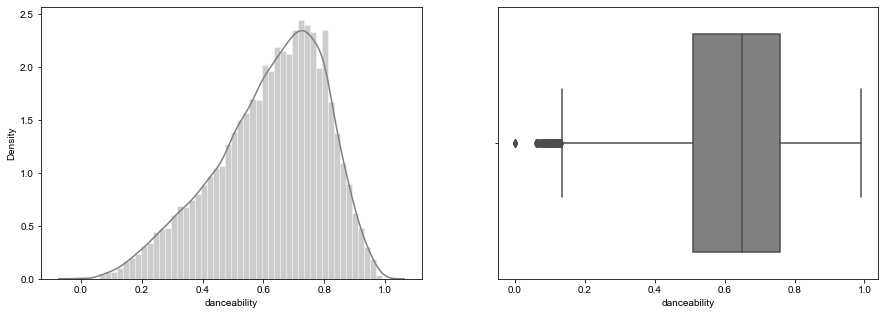

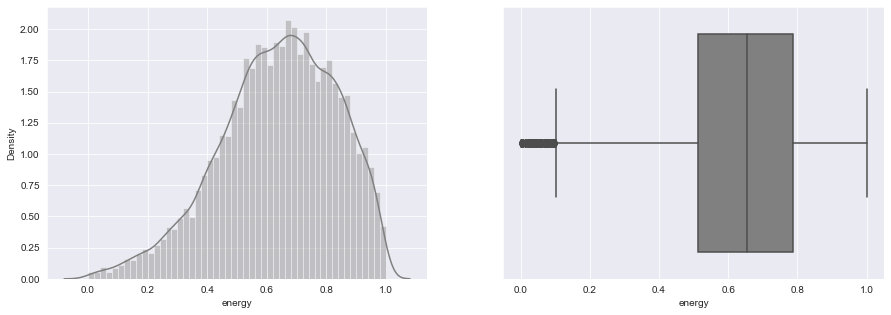

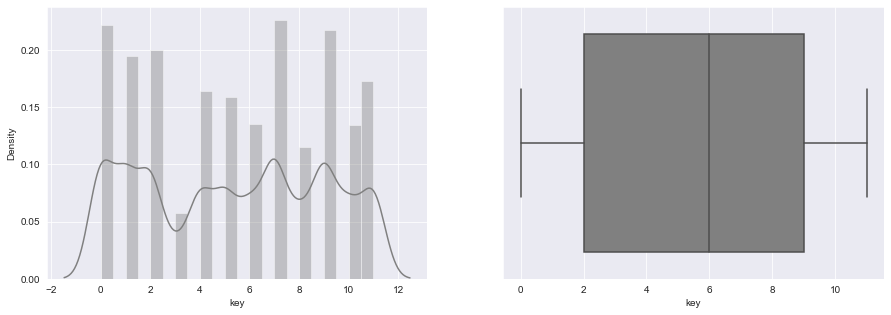

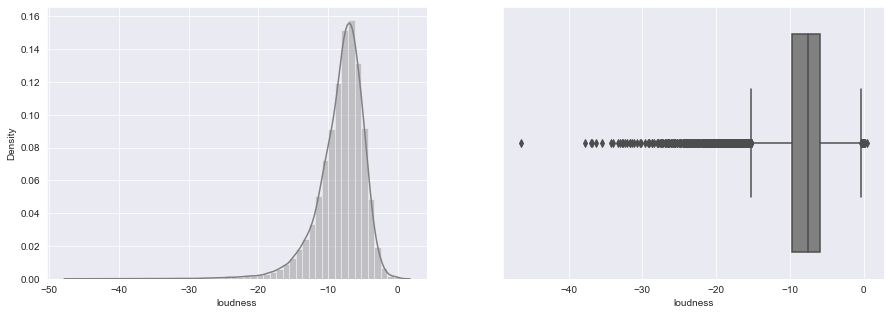

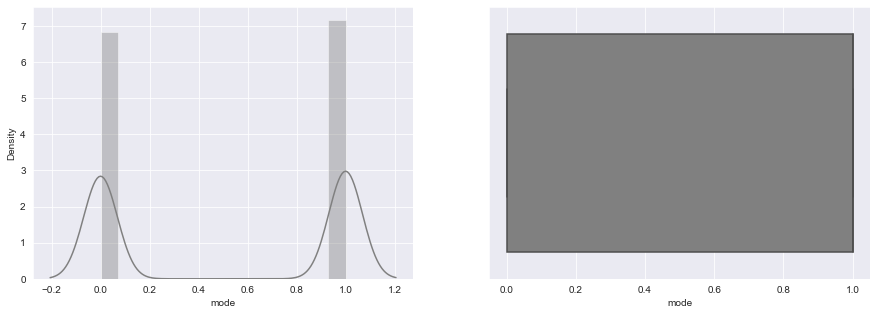

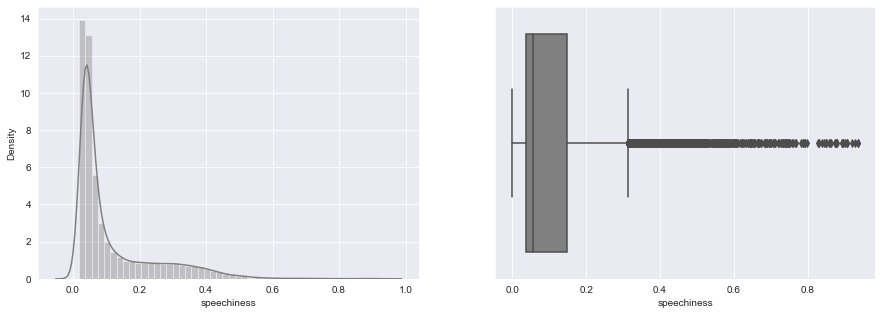

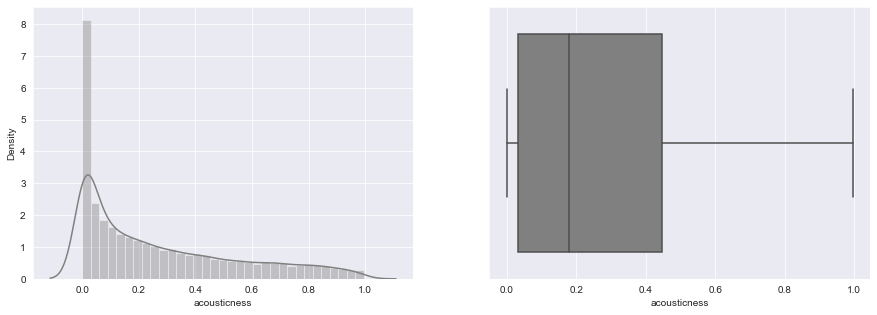

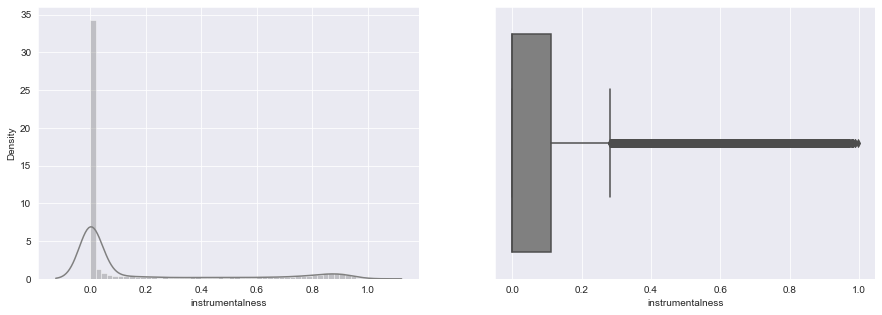

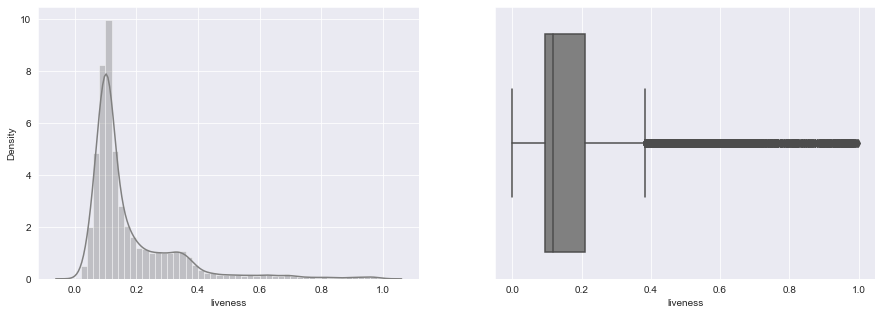

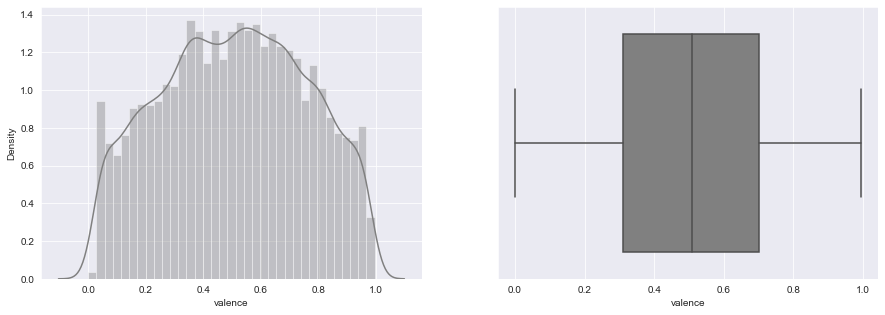

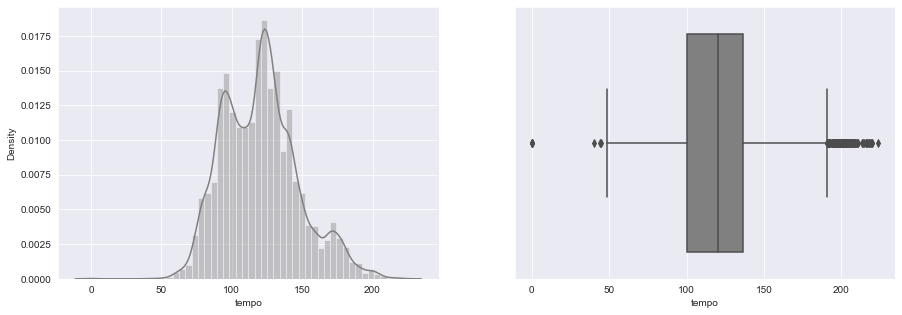

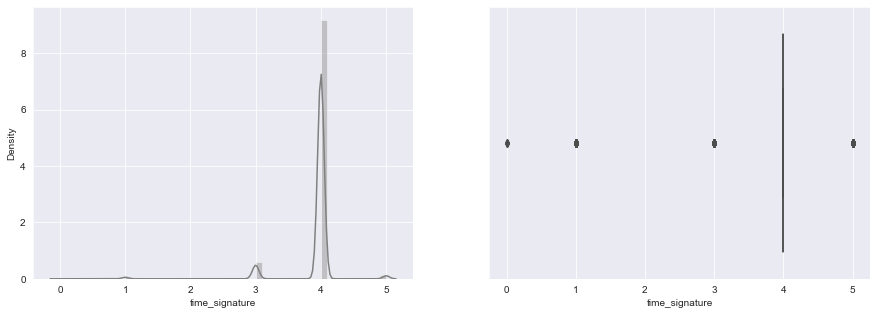

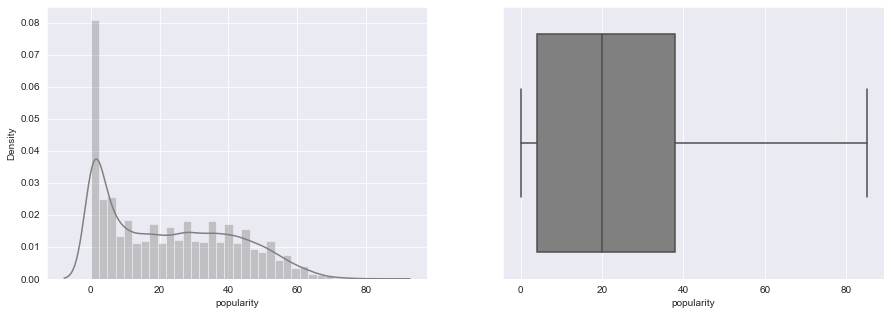

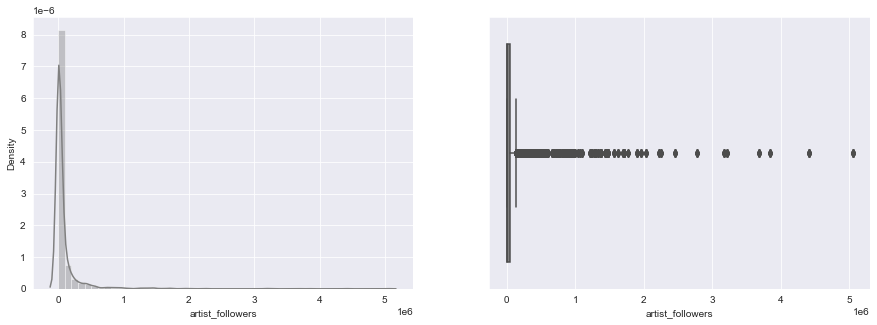

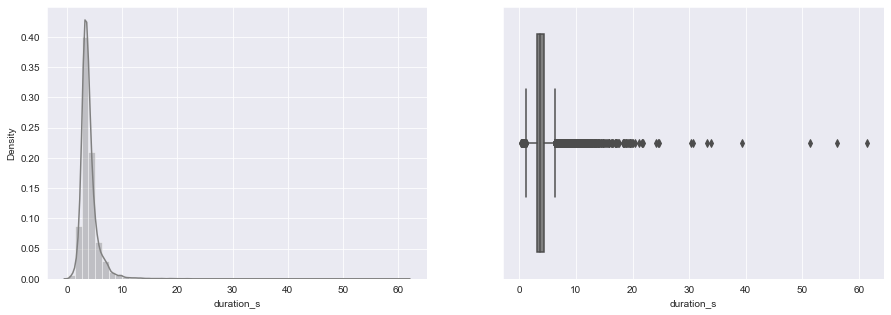

In [67]:
num = df2.select_dtypes('number')
for c in num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.set_style("darkgrid")
    sns.distplot(num[c], ax=axes[0],  color = 'gray')
    sns.boxplot(num[c], ax=axes[1],  color = 'gray')
    plt.show()

In [68]:
df2.to_csv(r'\Users\Dubun\IronHack\Other\Labs\Final project\database\m', index=False, header = True)